In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import gamma, lognorm, expon, norm
from scipy.stats import levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# **A. Analyse de variance à un facteur (ANOVA-One Way)**

Ici, nous avons considéré les 3 groupes de la période 1 car nous avons 3 groupes et 2 périodes dans le fichier fourni et la période n'est pas un élement à prendre en compte dans cette partie. Il n' pas été mentionné de devoir analyser les 2 périodes séparemment

In [ ]:
#Importation du fichier Excel
fichier = '/content/Gain.xlsx'
fichier2 = '/content/Consum.xlsx'

df = pd.read_excel(fichier)
print(df.head())

  Période 14-28 jours  Unnamed: 1 Unnamed: 2 Période 28-42 jours  Unnamed: 4  \
0                  D1          D2         D3                  D1          D2   
1           62.414286       91.26  56.261429          106.428571   81.635338   
2           95.381429   72.872857  55.938571          121.428571  131.428571   
3               71.05   87.562857  68.647143          111.428571  105.714286   
4           75.775714  104.277143  73.438571           79.285714   80.714286   

  Unnamed: 5  
0         D3  
1  88.571429  
2  90.714286  
3  85.714286  
4  95.714286  


In [ ]:
periode1 = ['Période 14-28 jours', 'Unnamed: 1','Unnamed: 2']
df_periode1_titre = df[periode1]

#Retirer la ligne en plus
df_periode_1 = df_periode1_titre.iloc[1:]

#Renommer les colonnes
nouvelles_colonnes = {'Période 14-28 jours': 'D1', 'Unnamed: 1': 'D2','Unnamed: 2': 'D3'}
df_periode_1 = df_periode_1.rename(columns=nouvelles_colonnes)
print(df_periode_1.head())

###Data frame période2
periode2 = ['Période 28-42 jours', 'Unnamed: 4','Unnamed: 5']
df_periode2_titre = df[periode1]

#Retirer la ligne en plus
df_periode_2 = df_periode2_titre.iloc[1:]

#Renommer les colonnes
nouvelle_col = {'Période 28-42 jours': 'D1', 'Unnamed: 4': 'D2','Unnamed: 5': 'D3'}
df_periode_2 = df_periode_2.rename(columns=nouvelle_col)
print(df_periode_1.head())

          D1          D2         D3
1  62.414286       91.26  56.261429
2  95.381429   72.872857  55.938571
3      71.05   87.562857  68.647143
4  75.775714  104.277143  73.438571
5  83.944286       90.24  63.662857
          D1          D2         D3
1  62.414286       91.26  56.261429
2  95.381429   72.872857  55.938571
3      71.05   87.562857  68.647143
4  75.775714  104.277143  73.438571
5  83.944286       90.24  63.662857


### **A.2 Sélection du niveau de signification**

Le niveau de signification choisi est 0.05

### **A.3 Vérification des hypothèses de l’ANOVA-One Way**

In [ ]:
###A.3  Vérification des hypothèses de l’ANOVA-One Way
# 1. Normalité : Test de Shapiro-Wilk
D1 = df_periode_1['D1']
D2 = df_periode_1['D2']
D3 = df_periode_1['D3']

#Test de normalité avec le test de Shapiro-Wilk
#Effectuer le test sur chaque groupe

for column in df_periode_1.columns:
    print(f"\nTest de Shapiro-Wilk pour le groupe {column}:\n{'=' * 40}")

    # Test de normalité (Shapiro-Wilk)
    stat, p_value = shapiro(df_periode_1[column])
    print("Statistique de test de Shapiro-Wilk :", stat)
    print("p-value :", p_value)

    if p_value < 0.05:
        print(f"Les données du groupe {column} ne suivent pas une distribution normale.")
    else:
        print(f"Les données du groupe {column} suivent une distribution normale.")




Test de Shapiro-Wilk pour le groupe D1:
Statistique de test de Shapiro-Wilk : 0.9690218567848206
p-value : 0.30609703063964844
Les données du groupe D1 suivent une distribution normale.

Test de Shapiro-Wilk pour le groupe D2:
Statistique de test de Shapiro-Wilk : 0.9773867130279541
p-value : 0.5625195503234863
Les données du groupe D2 suivent une distribution normale.

Test de Shapiro-Wilk pour le groupe D3:
Statistique de test de Shapiro-Wilk : 0.9083178639411926
p-value : 0.002578434767201543
Les données du groupe D3 ne suivent pas une distribution normale.


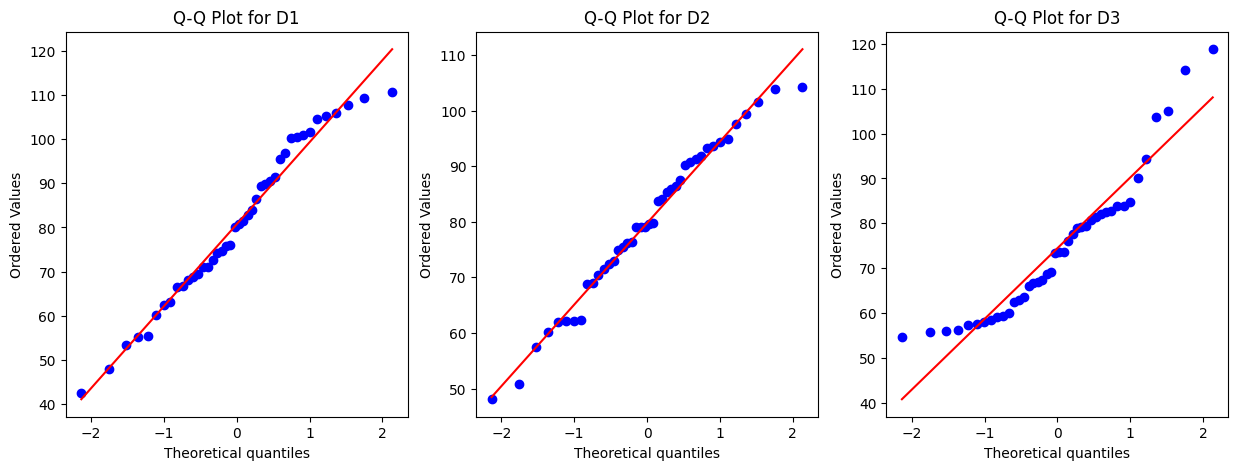

In [ ]:
#Créer le graphique Q-Q pour confirmer

D1_array = D1.values.astype(float)
D2_array = D2.values.astype(float)
D3_array = D3.values.astype(float)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Graphique Q-Q de D1
stats.probplot(D1_array, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot for D1')

#Graphique Q-Q de D2
stats.probplot(D2_array, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for D2')

#Graphique Q-Q de D3
stats.probplot(D3_array, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot for D3')

plt.show()


Les données du groupe 3 ne suivent pas une distribution normale

In [ ]:
#Tester la variance
for column in df_periode_1.columns:
    print(f"\nVariance du groupe {column}:")
    var = np.std(df_periode_1[column])**2
    print(var)

#Test de Levene
statistic, p_value_lev = levene(D1_array, D2_array, D3_array)

print("\nTest de Levene")
print(f"Statistique de Levene : {statistic}")
print(f"P-value : {p_value_lev}")

#Interprétation
if p_value_lev < 0.05:
    print("Les variances ne sont pas égales")
else:
    print("Les variances sont égales")


Variance du groupe D1:
323.6972079885696

Variance du groupe D2:
200.36094695773784

Variance du groupe D3:
250.30990874917754

Test de Levene
Statistique de Levene : 1.7188159149081645
P-value : 0.18355602669700757
Les variances sont égales


### **A.4 Analyse des données discrètes**

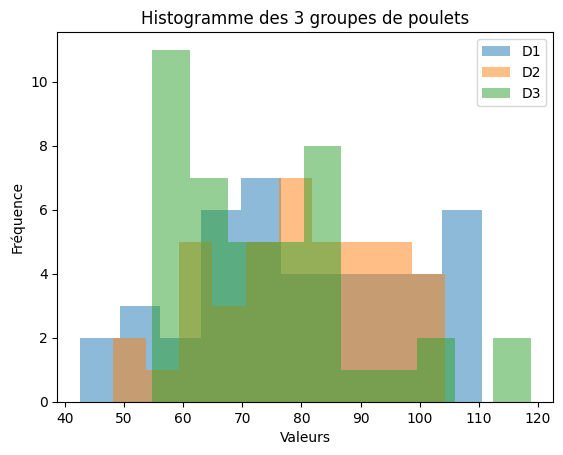

In [ ]:
###A.4  Analyse des données discrètes

#Plot pour voir la distri
plt.hist(D1, alpha=0.5, label='D1', bins=10)
plt.hist(D2, alpha=0.5, label='D2', bins=10)
plt.hist(D3, alpha=0.5, label='D3', bins=10)

plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des 3 groupes de poulets')
plt.legend(loc='upper right')

plt.show()

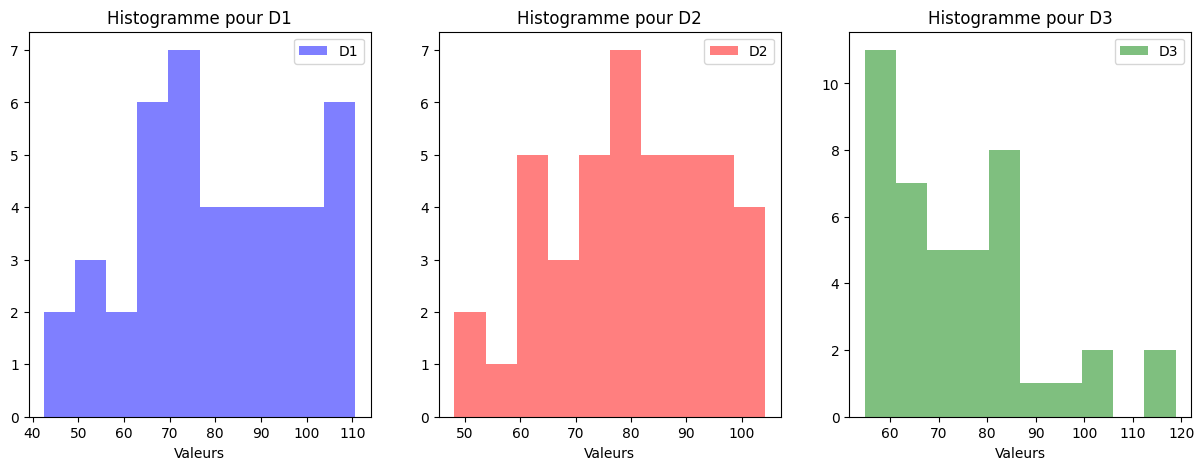

In [ ]:
###A.4  Analyse des données discrètes

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Histogramme pour D1
axes[0].hist(D1, alpha=0.5, label='D1', bins=10, color='b')
axes[0].set_title('Histogramme pour D1')
axes[0].set_xlabel('Valeurs')
axes[0].legend()

#Histogramme pour D2
axes[1].hist(D2, alpha=0.5, label='D2', bins=10, color='r')
axes[1].set_title('Histogramme pour D2')
axes[1].set_xlabel('Valeurs')
axes[1].legend()

#Histogramme pour D3
axes[2].hist(D3, alpha=0.5, label='D3', bins=10, color='g')
axes[2].set_title('Histogramme pour D3')
axes[2].set_xlabel('Valeurs')
axes[2].legend()

plt.show()

### **A.5 Choix d'une distribution continue**

Nous avons choisi d'aproximer la distributions des données avec une loi normale

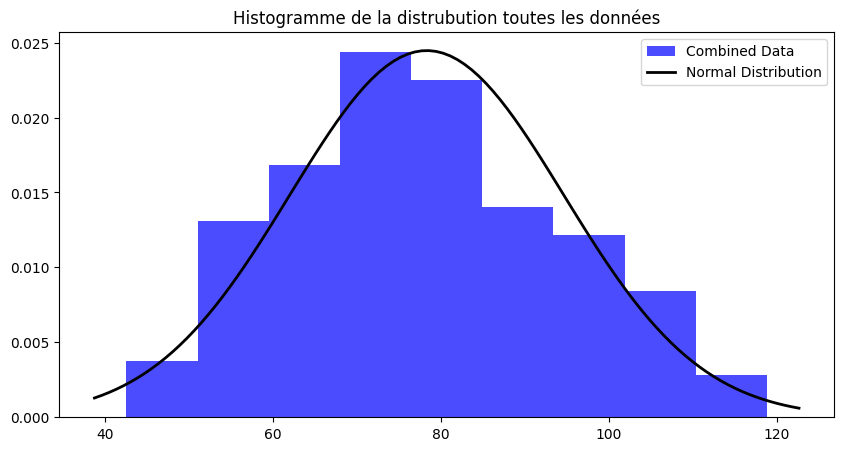

In [ ]:
###A.5 Choix d'une distribution continue
#Toutes les données
total_data = np.concatenate([D1_array, D2_array, D3_array])

#Calcul de la moyenne et de l'écart type
combined_mean = np.mean(total_data)
combined_std = np.std(total_data)

#Créer l'histogramme
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(total_data, bins='auto', density=True, alpha=0.7, color='b', label='Combined Data')

#Dessiner la courbe de la loi normale
xmin_combined, xmax_combined = ax.get_xlim()
x_combined = np.linspace(xmin_combined, xmax_combined, 100)
p_combined = stats.norm.pdf(x_combined, combined_mean, combined_std)
ax.plot(x_combined, p_combined, 'k', linewidth=2, label='Normal Distribution')

ax.set_title('Histogramme de la distrubution toutes les données')
ax.legend()

plt.show()


### **A.6 Estimation des paramètres**

In [ ]:
###A.6 Estimation des parametres
print('Paramètres de la loi normale')
print('Moyenne : ', combined_mean)
print('Ecart-type : ', combined_std)


Paramètres de la loi normale
Moyenne :  78.2968599634976
Ecart-type :  16.303366767796366


### **A.7 Tracé de la distribution continue**

Le tracé a été fait sur le précedant histogramme (Q A.5)





### **A.8 Evaluation de l'adéquation**

La distribution continue proposée qui est la distribution normale semble concorder avec les données discrètes

### **A.9 Estimation des statistiques descriptives**

In [ ]:
###A.9  Estimation des statistiques descriptives

def estimer_param(X):
  mean = np.mean(X)
  std = np.std(X)
  med = np.median(X)

# Affichage des résultats
  print("Moyenne :", mean)
  print("Ecart-type :", std)
  print("Mediane :", med)

  return (mean,std,med)

print("Groupe D1:")
moy_1, ecart_1, med_1 = estimer_param(D1_array)

print("\n Groupe D2:")
moy_2, ecart_2, med_2 = estimer_param(D2_array)

print("\n Groupe D3:")
moy_3, ecart_3, med_3 = estimer_param(D3_array)

Groupe D1:
Moyenne : 80.71921768707482
Ecart-type : 17.99158714478991
Mediane : 80.36857142857144

 Groupe D2:
Moyenne : 79.75303135888501
Ecart-type : 14.154891273257377
Mediane : 79.33571428571429

 Groupe D3:
Moyenne : 74.41833084453295
Ecart-type : 15.821185440705053
Mediane : 73.565


### **A.10 Distribution des données**

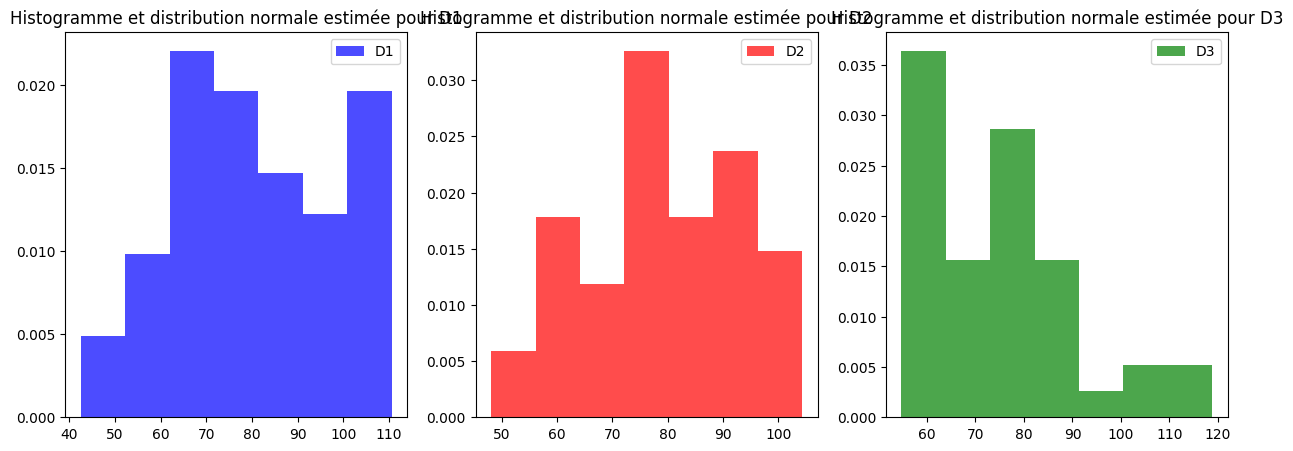

In [ ]:
###A.10  Distribution des données

#Création des subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Histogramme pour D1
axes[0].hist(D1_array, bins='auto', density=True, alpha=0.7, color='b', label='D1')
axes[0].set_title('Histogramme et distribution normale estimée pour D1')
axes[0].legend()

#Histogramme pour D2
axes[1].hist(D2_array, bins='auto', density=True, alpha=0.7, color='r', label='D2')
axes[1].set_title('Histogramme et distribution normale estimée pour D2')
axes[1].legend()

#Histogramme pour D3
axes[2].hist(D3_array, bins='auto', density=True, alpha=0.7, color='g', label='D3')
axes[2].set_title('Histogramme et distribution normale estimée pour D3')
axes[2].legend()

plt.show()

### **A.11 Bootstrap**

In [ ]:
###A.11  Bootstrap

#Nombre d'échantillons
nb_bootstrap = 100

bootstrap_means_D1 = [np.mean(np.random.choice(D1_array, size=len(D1_array), replace=True)) for _ in range(nb_bootstrap)]
bootstrap_means_D2 = [np.mean(np.random.choice(D2_array, size=len(D2_array), replace=True)) for _ in range(nb_bootstrap)]
bootstrap_means_D3 = [np.mean(np.random.choice(D3_array, size=len(D3_array), replace=True)) for _ in range(nb_bootstrap)]

bootstrap_medians_D1 = [np.median(np.random.choice(D1_array, size=len(D1_array), replace=True)) for _ in range(nb_bootstrap)]
bootstrap_medians_D2 = [np.median(np.random.choice(D2_array, size=len(D2_array), replace=True)) for _ in range(nb_bootstrap)]
bootstrap_medians_D3 = [np.median(np.random.choice(D3_array, size=len(D3_array), replace=True)) for _ in range(nb_bootstrap)]

bootstrap_std_D1 = [np.std(np.random.choice(D1_array, size=len(D1_array), replace=True)) for _ in range(nb_bootstrap)]
bootstrap_std_D2 = [np.std(np.random.choice(D2_array, size=len(D2_array), replace=True)) for _ in range(nb_bootstrap)]
bootstrap_std_D3 = [np.std(np.random.choice(D3_array, size=len(D3_array), replace=True)) for _ in range(nb_bootstrap)]

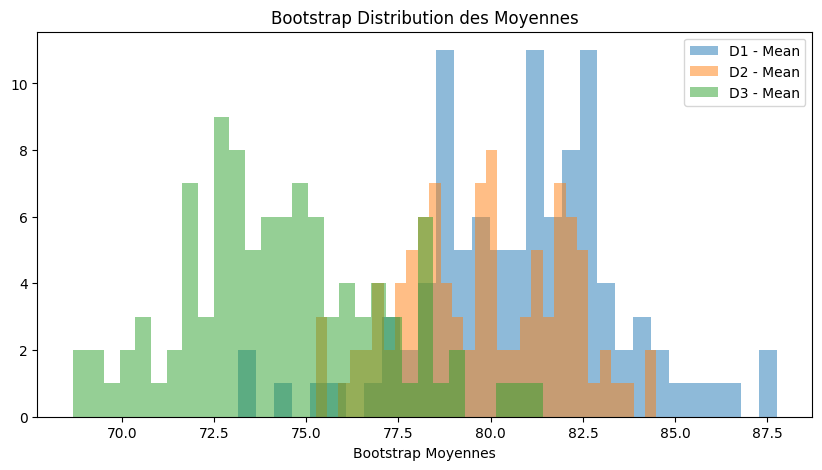

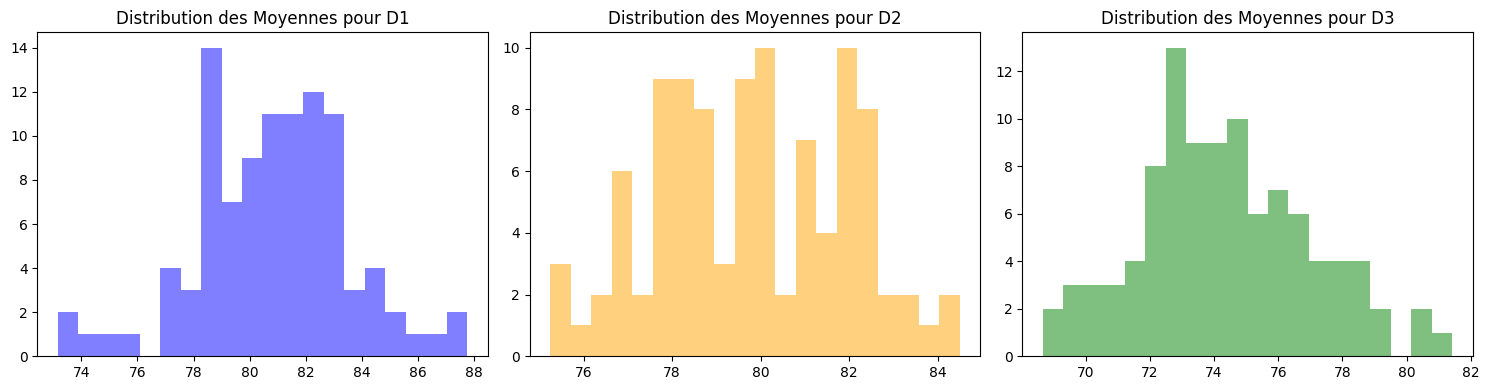

In [ ]:
##Moyennes

#Un graphique global
plt.figure(figsize=(10, 5))

plt.hist(bootstrap_means_D1, bins=30, alpha=0.5, label='D1 - Mean')
plt.hist(bootstrap_means_D2, bins=30, alpha=0.5, label='D2 - Mean')
plt.hist(bootstrap_means_D3, bins=30, alpha=0.5, label='D3 - Mean')
plt.xlabel('Bootstrap Moyennes')
plt.title('Bootstrap Distribution des Moyennes')
plt.legend()

#Sous-graphiques
#Plot pour D1
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means_D1, bins=20, color='blue', alpha=0.5)
plt.title('Distribution des Moyennes pour D1')

#Plot pour D2
plt.subplot(1, 3, 2)
plt.hist(bootstrap_means_D2, bins=20, color='orange', alpha=0.5)
plt.title('Distribution des Moyennes pour D2')

#Plot pour D3
plt.subplot(1, 3, 3)
plt.hist(bootstrap_means_D3, bins=20, color='green', alpha=0.5)
plt.title('Distribution des Moyennes pour D3')

plt.tight_layout()

plt.show()



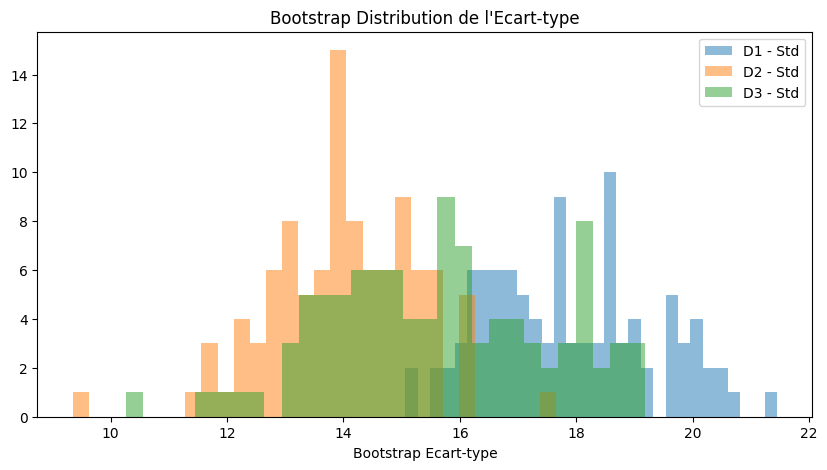

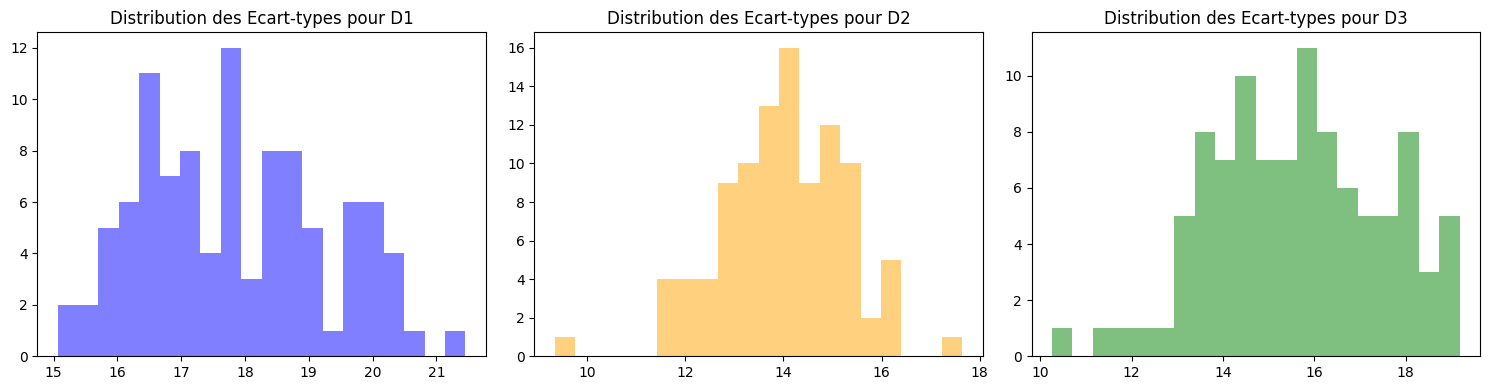

In [ ]:
#Ecart-type
plt.figure(figsize=(10, 5))

plt.hist(bootstrap_std_D1, bins=30, alpha=0.5, label='D1 - Std')
plt.hist(bootstrap_std_D2, bins=30, alpha=0.5, label='D2 - Std')
plt.hist(bootstrap_std_D3, bins=30, alpha=0.5, label='D3 - Std')
plt.xlabel('Bootstrap Ecart-type')
plt.title("Bootstrap Distribution de l'Ecart-type")
plt.legend()

#Sous-graphiques
#Plot pour D1
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(bootstrap_std_D1, bins=20, color='blue', alpha=0.5)
plt.title('Distribution des Ecart-types pour D1')

#Plot pour D2
plt.subplot(1, 3, 2)
plt.hist(bootstrap_std_D2, bins=20, color='orange', alpha=0.5)
plt.title('Distribution des Ecart-types pour D2')

#Plot pour D3
plt.subplot(1, 3, 3)
plt.hist(bootstrap_std_D3, bins=20, color='green', alpha=0.5)
plt.title('Distribution des Ecart-types pour D3')

plt.tight_layout()


plt.show()



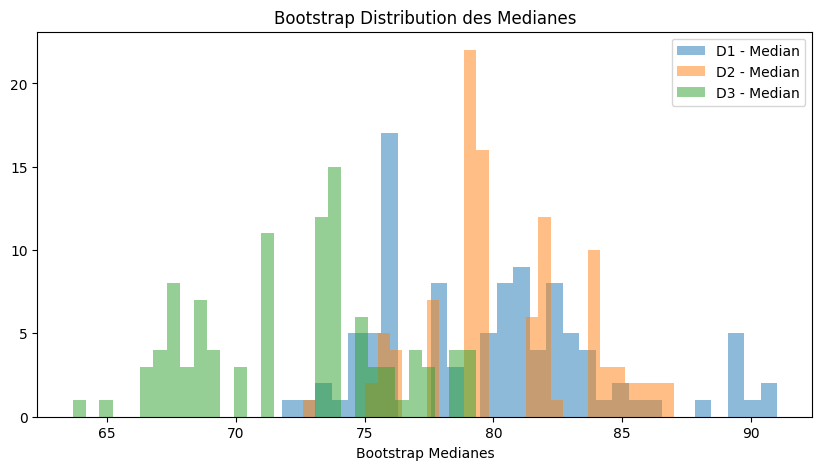

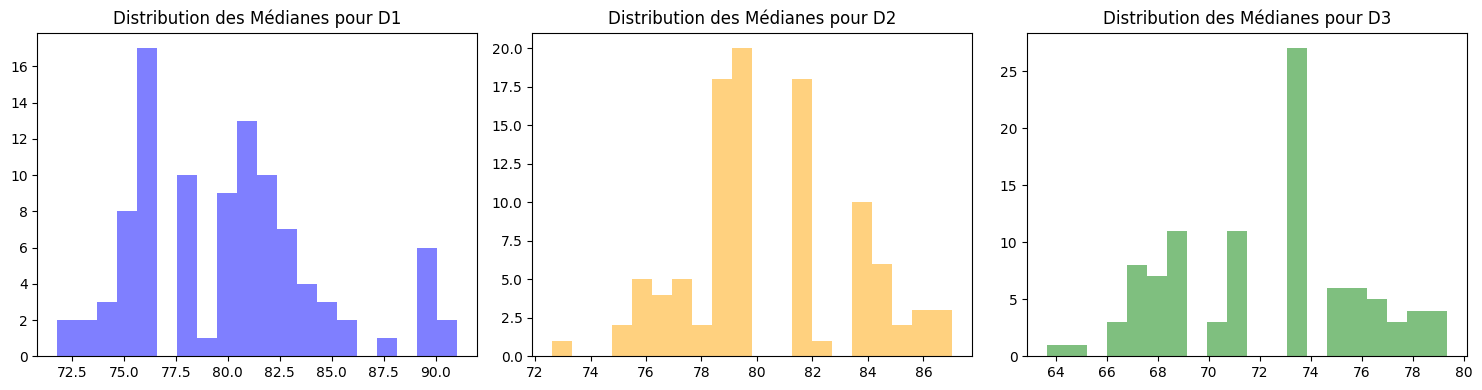

In [ ]:
#Médianes
plt.figure(figsize=(10, 5))

plt.hist(bootstrap_medians_D1, bins=30, alpha=0.5, label='D1 - Median')
plt.hist(bootstrap_medians_D2, bins=30, alpha=0.5, label='D2 - Median')
plt.hist(bootstrap_medians_D3, bins=30, alpha=0.5, label='D3 - Median')
plt.xlabel('Bootstrap Medianes')
plt.title('Bootstrap Distribution des Medianes')
plt.legend()

#Sous-graphiques
#Plot pour D1
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(bootstrap_medians_D1, bins=20, color='blue', alpha=0.5)
plt.title('Distribution des Médianes pour D1')

#Plot pour D2
plt.subplot(1, 3, 2)
plt.hist(bootstrap_medians_D2, bins=20, color='orange', alpha=0.5)
plt.title('Distribution des Médianes pour D2')

#Plot pour D3
plt.subplot(1, 3, 3)
plt.hist(bootstrap_medians_D3, bins=20, color='green', alpha=0.5)
plt.title('Distribution des Médianes pour D3')

plt.tight_layout()

plt.show()


### **A.12 Intervalles de confiance**

In [ ]:
###A.12  Intervalles de confiance


#Fonction pour calculer les IC95 de bootstrap
def bootstrap_intervalles_conf(ech_bootstrap):
    lower_percentile = (1 - 0.95) / 2 * 100
    upper_percentile = 100 - lower_percentile

    borne_inf = np.percentile(ech_bootstrap, lower_percentile)
    borne_sup = np.percentile(ech_bootstrap, upper_percentile)

    return borne_inf, borne_sup

#Calcul IC pour les moyennes
ci_means_D1 = bootstrap_intervalles_conf(bootstrap_means_D1)
ci_means_D2 = bootstrap_intervalles_conf(bootstrap_means_D2)
ci_means_D3 = bootstrap_intervalles_conf(bootstrap_means_D3)

#Calcul IC pour les médianes
ci_medians_D1 = bootstrap_intervalles_conf(bootstrap_medians_D1)
ci_medians_D2 = bootstrap_intervalles_conf(bootstrap_medians_D2)
ci_medians_D3 = bootstrap_intervalles_conf(bootstrap_medians_D3)

#Calcul IC pour les ecarts-type
ci_std_D1 = bootstrap_intervalles_conf(bootstrap_std_D1)
ci_std_D2 = bootstrap_intervalles_conf(bootstrap_std_D2)
ci_std_D3 = bootstrap_intervalles_conf(bootstrap_std_D3)

print("Intervalle de confiance pour les moyennes:")
print("D1:", ci_means_D1)
print("D2:", ci_means_D2)
print("D3:", ci_means_D3)

print("\nIntervalle de confiance pour les médianes:")
print("D1:", ci_medians_D1)
print("D2:", ci_medians_D2)
print("D3:", ci_medians_D3)

print("\nIntervalle de confiance pour les écarts-type:")
print("D1:", ci_std_D1)
print("D2:", ci_std_D2)
print("D3:", ci_std_D3)



Intervalle de confiance pour les moyennes:
D1: (74.78797363945579, 86.22118792517006)
D2: (75.70704081632654, 83.46970482827277)
D3: (69.42573724489796, 79.90078113074496)

Intervalle de confiance pour les médianes:
D1: (73.54035714285715, 89.69414285714285)
D2: (75.62314285714285, 86.3191607142857)
D3: (66.57875, 79.04448083623694)

Intervalle de confiance pour les écarts-type:
D1: (15.570768019997294, 20.452761092434834)
D2: (11.690878872522536, 16.155425953627788)
D3: (11.981868527817415, 18.896710655395385)


### **A.13 Réalisation de l'analyse**

In [ ]:
###A.12  Réalisation de l’analyse

#Effectuer l'ANOVA One Way
f_statistic, p_value = f_oneway(D1, D2, D3)

print("ANOVA Statistic:", f_statistic)
print("P-value:", p_value)

#Interprétation des résultats
if p_value < 0.05:
    print("Il y a au moins une différence significative entre les moyennes.")
else:
    print("Il n’y a pas de différences significatives entre les moyennes.")


ANOVA Statistic: 1.8291318285565272
P-value: 0.16489301386388155
Il n’y a pas de différences significatives entre les moyennes.


In [ ]:
# Effectuer le test de Tukey pour les différences significatives entre les groupes
data = np.concatenate([D1_array, D2_array, D3_array])
labels = ['D1'] * len(D1) + ['D2'] * len(D2) + ['D3'] * len(D3)

tukey_results = pairwise_tukeyhsd(data, labels, alpha=0.05)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    D1     D2  -0.9662   0.96  -9.3846 7.4522  False
    D1     D3  -6.3009  0.182 -14.7193 2.1175  False
    D2     D3  -5.3347 0.2929 -13.7531 3.0837  False
----------------------------------------------------


# **C. Analyse de variance à deux facteurs (ANOVA-Two Way)**


In [ ]:
#Importation du fichier Excel

df = pd.read_excel(fichier2)
print(df.head())

  Période 14-28 jours  Unnamed: 1 Unnamed: 2 Période 28-42 jours  Unnamed: 4  \
0                  D1          D2         D3                  D1          D2   
1           77.328095   74.396341  79.739762          152.857143  151.219512   
2           86.878333   84.013415  86.242381          162.142857  157.073171   
3           93.370476   97.926829  90.299048          165.952381  164.878049   
4           99.803571  100.599512  97.282381          168.809524  168.536585   

   Unnamed: 5  
0          D3  
1  142.738095  
2  151.071429  
3  158.809524  
4  162.142857  


In [ ]:
periodes = ['Période 14-28 jours', 'Unnamed: 1','Unnamed: 2','Période 28-42 jours', 'Unnamed: 4','Unnamed: 5']

df_consum_titre = df[periodes]

#Retirer la ligne en plus
df_consum = df_consum_titre.iloc[1:]

#Renommer les colonnes
nouv_colonnes = {'Période 14-28 jours': 'P1_D1', 'Unnamed: 1': 'P1_D2','Unnamed: 2': 'P1_D3','Période 28-42 jours' : 'P2_D1', 'Unnamed: 4' : 'P2_D2','Unnamed: 5' : 'P2_D3'}
df_consum = df_consum.rename(columns=nouv_colonnes)
print(df_consum)

         P1_D1       P1_D2       P1_D3       P2_D1       P2_D2       P2_D3
1    77.328095   74.396341   79.739762  152.857143  151.219512  142.738095
2    86.878333   84.013415   86.242381  162.142857  157.073171  151.071429
3    93.370476   97.926829   90.299048  165.952381  164.878049  158.809524
4    99.803571  100.599512   97.282381  168.809524  168.536585  162.142857
5   102.738095  101.853659  101.904762  168.452381  172.317073   162.02381
6   113.142857  111.341463  109.738095  173.214286  175.853659  168.571429
7   118.452381   118.04878  114.880952  180.595238  171.829268  167.142857
8   119.166667  119.512195   115.47619  181.547619  177.439024  167.738095
9   127.142857  126.463415  121.428571  182.619048  178.292683  168.452381
10  131.666667  127.560976  128.214286  182.142857  183.414634  169.880952
11  136.428571  135.121951  131.190476  182.619048         185  175.714286
12  135.238095  133.658537  133.571429  164.761905  157.317073       157.5
13  140.357143   141.9512

### **C.2 Estimation des paramètres**

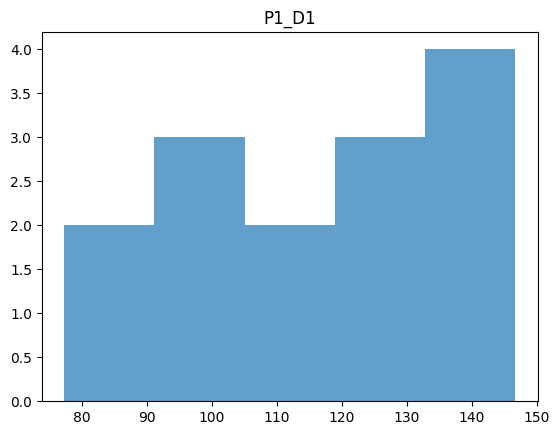

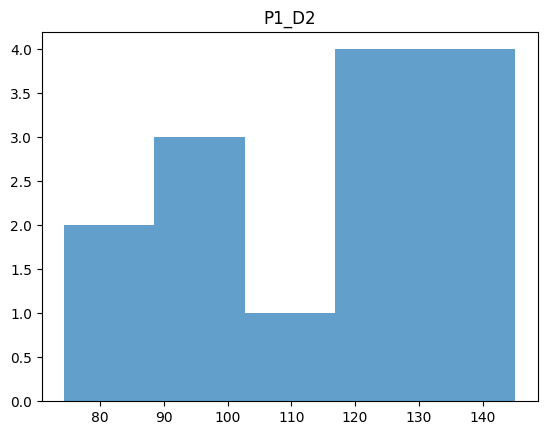

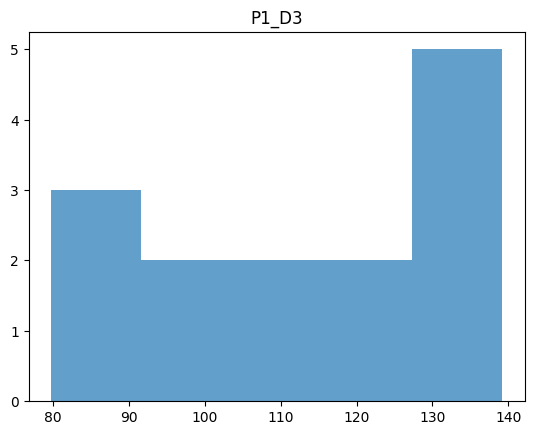

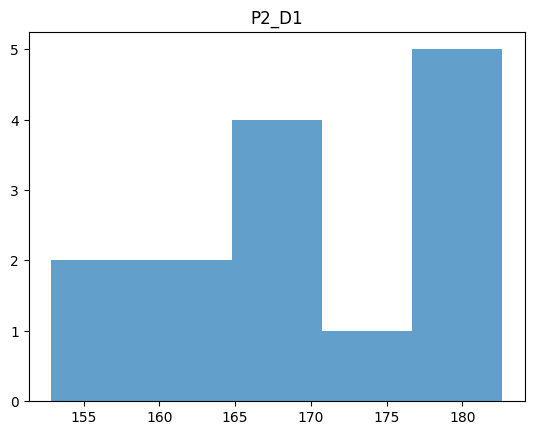

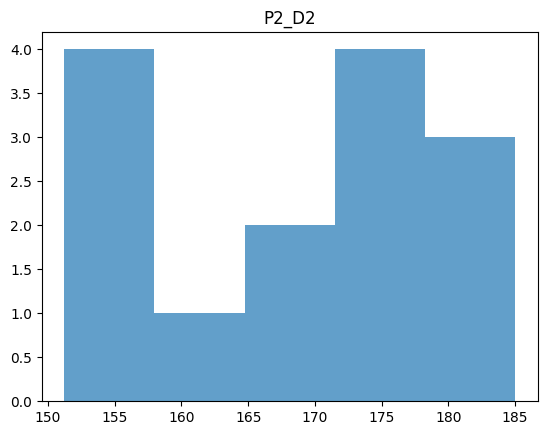

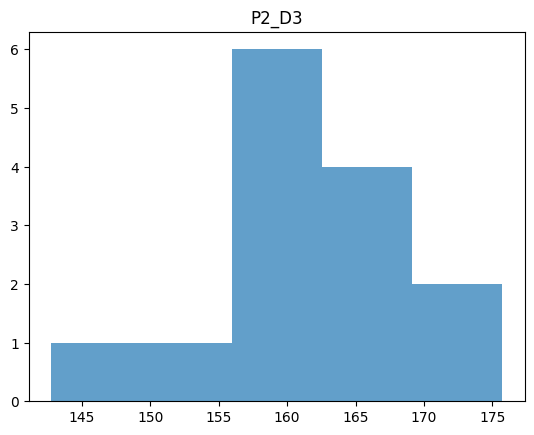

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
#C.2  Estimation des paramètres
# Visualiser l'histogramme pour chaque groupe de chaque période pour avoir une idée génerale
for col in df_consum.columns:
    plt.hist(df_consum[col], bins='auto', alpha=0.7)
    plt.title(col)
    plt.show()

#L'histogramme de toutes les données est dans la case suivante, c'est celui que nous allons considérer
moy = np.mean(df_consum)
std = np.std(df_consum)

### **C.2 et 3 Estimation des paramètres et Tracé de la distribution continue**

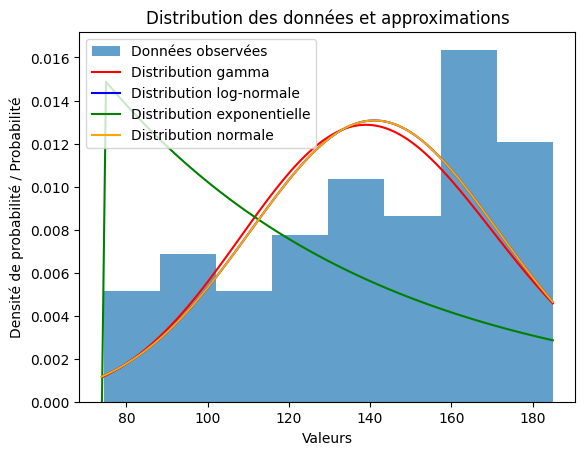

In [ ]:
#Unir toutes les colonnes en une seule série de données
data_consum = df_consum.values.flatten().astype(float)

#Ajuster la distribution gamma aux données
params_gamma = gamma.fit(data_consum)

#Ajuster la distribution log-normale aux données
params_lognorm = lognorm.fit(data_consum)

#Ajuster la distribution exponentielle aux données
params_expon = expon.fit(data_consum)

#Ajuster la distribution normale aux données
params_norm = norm.fit(data_consum)

#Afficher l'histogramme
plt.hist(data_consum, bins='auto', density=True, alpha=0.7, label='Données observées')

#Créer une plage de valeurs pour les différentes distributions
x = np.arange(int(np.min(data_consum)), int(np.max(data_consum))+1)
pdf_gamma = gamma.pdf(x, *params_gamma)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
pdf_expon = expon.pdf(x, *params_expon)
pdf_norm = norm.pdf(x, *params_norm)

#Superposer les différentes distributions
plt.plot(x, pdf_gamma, label='Distribution gamma', color='red')
plt.plot(x, pdf_lognorm, label='Distribution log-normale', color='blue')
plt.plot(x, pdf_expon, label='Distribution exponentielle', color='green')
plt.plot(x, pdf_norm, label='Distribution normale', color='orange')

plt.title("Distribution des données et approximations")
plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité / Probabilité")
plt.legend()
plt.show()


Il semblerait qu'on peut approximer les données avec les lois normales et Gamma avec les paramètres

In [ ]:
print('Paramètres loi Normale : ',params_norm)
print('Paramètres loi Gamma : ',params_gamma)


Paramètres loi Normale :  (141.0392996100879, 30.5156041220392)
Paramètres loi Gamma :  (222.41821368802135, -322.05485183097073, 2.0821247308743684)


### **C.4 ANOVA Two-Way**

In [ ]:
### C.4 ANOVA Two-Way

#Créer un DataFrame adapté pour l'ANOVA Two-Way
df_consum2= df_consum

df_cons = pd.DataFrame({
    'Diete': (['D1'] + ['D2'] + ['D3']) * 28  ,
    'Periode': (['P1'] * 3 + ['P2'] * 3) * 14,
    'Consommation': df_consum2.values.astype(float).flatten()
})

print(df_cons)



   Diete Periode  Consommation
0     D1      P1     77.328095
1     D2      P1     74.396341
2     D3      P1     79.739762
3     D1      P2    152.857143
4     D2      P2    151.219512
..   ...     ...           ...
79    D2      P1    145.121951
80    D3      P1    139.166667
81    D1      P2    155.714286
82    D2      P2    151.829268
83    D3      P2    156.309524

[84 rows x 3 columns]


In [ ]:
# Utiliser la formule pour l'ANOVA Two-Way
formula = 'Consommation ~ C(Diete) + C(Periode) + C(Diete):C(Periode)'

# Ajuster le modèle
model = ols(formula, data=df_cons).fit()

# Réaliser l'ANOVA
anova_table = anova_lm(model, typ=2)

# Afficher la table d'ANOVA
print(anova_table)


                           sum_sq    df           F        PR(>F)
C(Diete)               468.447410   2.0    0.867599  4.239713e-01
C(Periode)           56587.867842   1.0  209.609813  8.308914e-24
C(Diete):C(Periode)    107.184357   2.0    0.198513  8.203618e-01
Residual             21057.476366  78.0         NaN           NaN


In [ ]:
#Interpretation

p_value_diete = anova_table['PR(>F)']['C(Diete)']
if p_value_diete < 0.05:
    print(f"Le facteur 'Diète' a un effet significatif (p-value = {p_value_diete:.4f}).")
else:
    print(f"Le facteur 'Diète' n'a pas d'effet significatif (p-value = {p_value_diete:.4f}).")

# Facteur Période
p_value_periode = anova_table['PR(>F)']['C(Periode)']
if p_value_periode < 0.05:
    print(f"Le facteur 'Période' a un effet significatif (p-value = {p_value_periode:.4f}).")
else:
    print(f"Le facteur 'Période' n'a pas d'effet significatif (p-value = {p_value_periode:.4f}).")

# Interaction entre Diète et Période
p_value_interaction = anova_table['PR(>F)']['C(Diete):C(Periode)']
if p_value_interaction < 0.05:
    print(f"L'interaction entre 'Diète' et 'Période' a un effet significatif (p-value = {p_value_interaction:.4f}).")
else:
    print(f"L'interaction entre 'Diète' et 'Période' n'a pas d'effet significatif (p-value = {p_value_interaction:.4f}).")

Le facteur 'Diète' n'a pas d'effet significatif (p-value = 0.4240).
Le facteur 'Période' a un effet significatif (p-value = 0.0000).
L'interaction entre 'Diète' et 'Période' n'a pas d'effet significatif (p-value = 0.8204).


### **C.5 Vérification des hypothèses**


Analyse pour le groupe P1_D1:
Statistique de test de Shapiro-Wilk : 0.9552158713340759
Valeur p : 0.6441776752471924
Les données du groupe P1_D1 suivent une distribution normale.


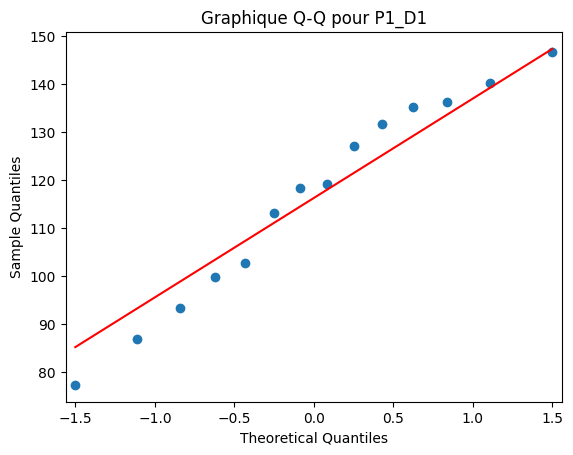


Analyse pour le groupe P1_D2:
Statistique de test de Shapiro-Wilk : 0.9581701755523682
Valeur p : 0.6928699016571045
Les données du groupe P1_D2 suivent une distribution normale.


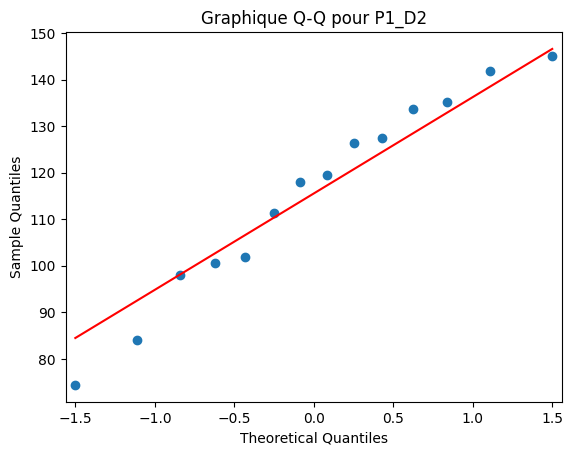


Analyse pour le groupe P1_D3:
Statistique de test de Shapiro-Wilk : 0.9418614506721497
Valeur p : 0.44269564747810364
Les données du groupe P1_D3 suivent une distribution normale.


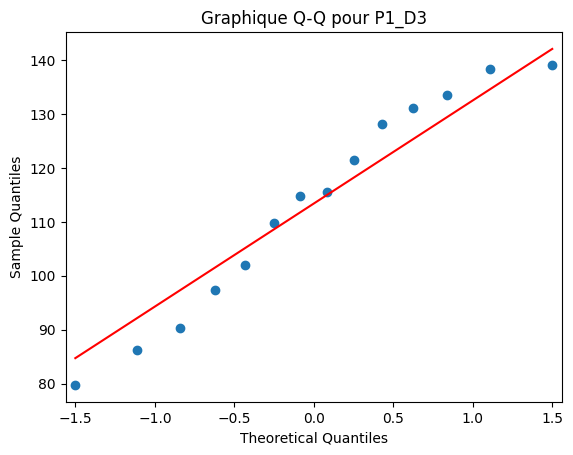


Analyse pour le groupe P2_D1:
Statistique de test de Shapiro-Wilk : 0.9059779047966003
Valeur p : 0.13774614036083221
Les données du groupe P2_D1 suivent une distribution normale.


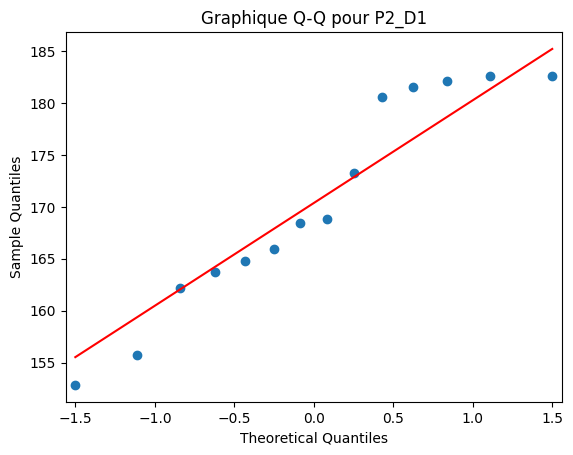


Analyse pour le groupe P2_D2:
Statistique de test de Shapiro-Wilk : 0.9490488171577454
Valeur p : 0.5460373759269714
Les données du groupe P2_D2 suivent une distribution normale.


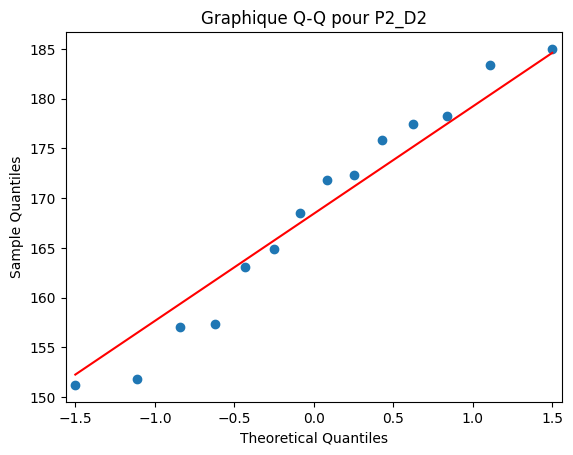


Analyse pour le groupe P2_D3:
Statistique de test de Shapiro-Wilk : 0.9521194100379944
Valeur p : 0.5940701961517334
Les données du groupe P2_D3 suivent une distribution normale.


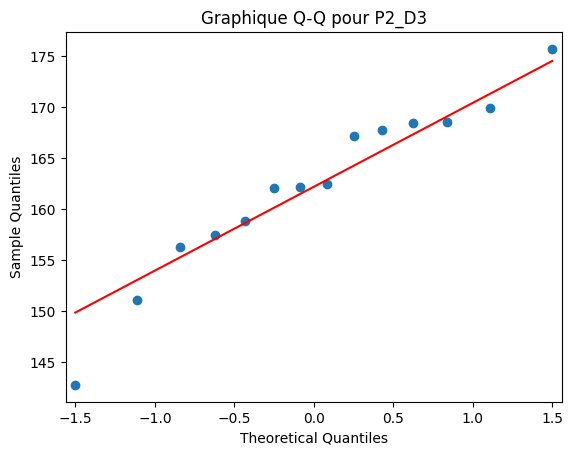

In [ ]:
### C.5 Vérification des hypothèses

#Effectuer les analyses pour chaque groupe
for column in df_consum.columns:
    print(f"\nAnalyse pour le groupe {column}:\n{'=' * 40}")

    #Test de normalité (Shapiro-Wilk)
    stat, p_value = shapiro(df_consum[column])
    print("Statistique de test de Shapiro-Wilk :", stat)
    print("Valeur p :", p_value)

    #Interprétation du test de normalité
    alpha = 0.05
    if p_value < alpha:
        print(f"Les données du groupe {column} ne suivent pas une distribution normale.")
    else:
        print(f"Les données du groupe {column} suivent une distribution normale.")


    #Graphique Q-Q
    sm.qqplot(df_consum[column].values.astype(float), line='s')
    plt.title(f"Graphique Q-Q pour {column}")
    plt.show()



Test de Shapiro-Wilk - Statistique : 0.982938826084137, P-value : 0.33173927664756775
Les résidus suivent une distribution normale.


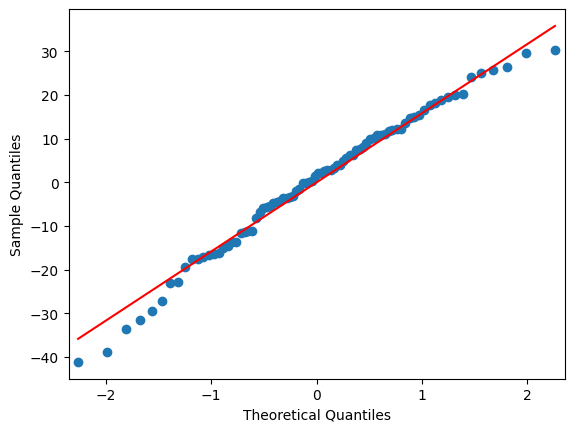

In [ ]:

###Test de Shapiro directement sur les résidus
#Récupérer les résidus du modèle
residuals = model.resid

#Test de normalité des résidus
stat, p_value = shapiro(residuals)
print(f"Test de Shapiro-Wilk - Statistique : {stat}, P-value : {p_value}")

#Interprétation du test de Shapiro-Wilk pour la normalité des résidus
if p_value > 0.05:
    print("Les résidus suivent une distribution normale.")
else:
    print("Les résidus ne suivent pas une distribution normale.")

#Q-Q plot pour évaluer la normalité des résidus
sm.qqplot(residuals, line='s')
plt.show()


In [ ]:
#Test de Levene pour l'homogénéité des variances
stat, p_value_lavene = levene(*[residuals[df_cons['Diete'] == diet] for diet in df_cons['Diete']])
print(f"Test de Levene - Statistique : {stat}, P-valeur : {p_value_lavene}")

#Interprétation
if p_value_lavene > 0.05:
    print("Les variances des résidus sont homogènes entre les groupes.")
else:
    print("Les variances des résidus ne sont pas homogènes entre les groupes.")


Test de Levene - Statistique : 0.22153709432758645, P-valeur : 0.999999999999991
Les variances des résidus sont homogènes entre les groupes.


### **C.6 Visualisations**

<ipython-input-274-2d5ed2d83d28>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Diete', y='Consommation', hue='Periode', data=df_cons, ci=None)


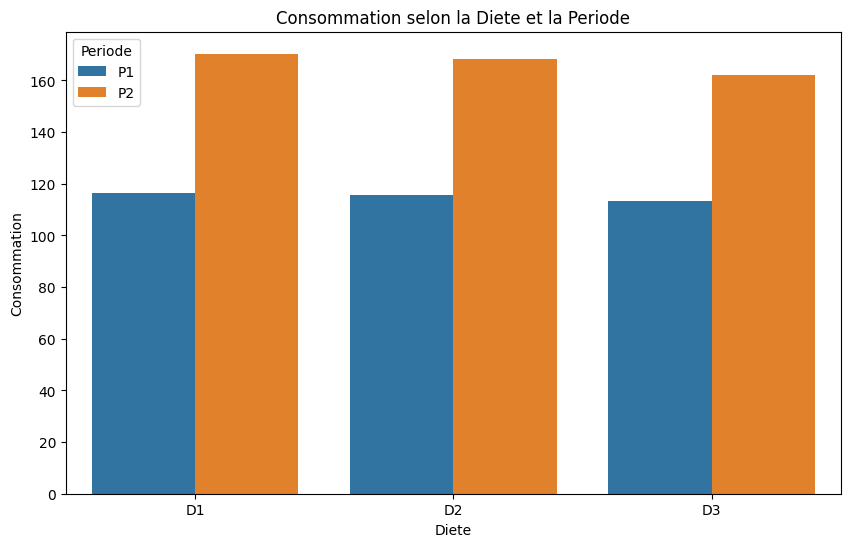

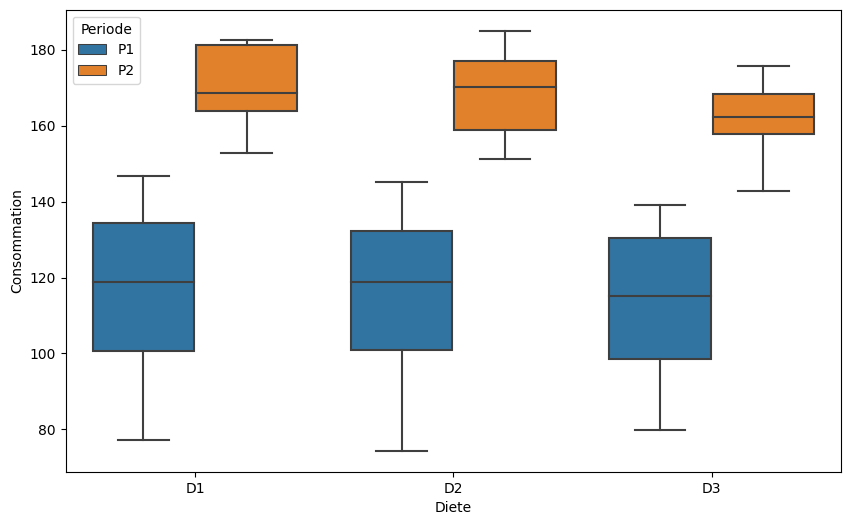

In [ ]:
###C.6 Visualisations

#Graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Diete', y='Consommation', hue='Periode', data=df_cons, ci=None)
plt.title('Consommation selon la Diete et la Periode')
plt.xlabel('Diete')
plt.ylabel('Consommation')
plt.show()

#Graphique en boîte
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diete', y='Consommation', hue='Periode', data=df_cons)
plt.xlabel('Diete')
plt.ylabel('Consommation')
plt.show()

### **C.7 Test post-hoc**

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    P1     P2  51.9101   0.0 44.8592 58.9611   True
---------------------------------------------------


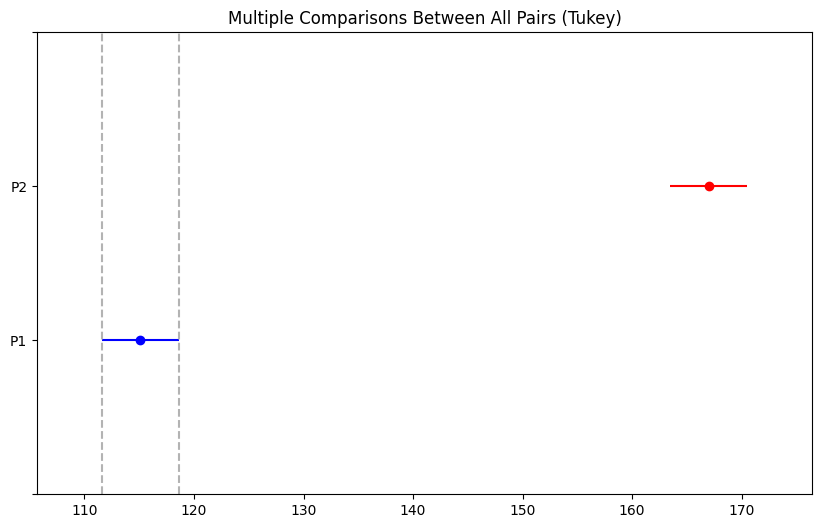

In [ ]:
#Test post-hoc de Tukey
mc = MultiComparison(df_cons['Consommation'], df_cons['Periode'])
result = mc.tukeyhsd()
print(result)

#Tracé du diagramme de boîte des comparaisons de Tukey
result.plot_simultaneous(comparison_name='P1', figsize=(10, 6))
plt.show()


### **C.8 Interprétation des interactions**

Courbes pour mieux voir les intéractions.

  Diete Periode  Consommation
0    D1      P1    116.312891
1    D1      P2    170.365646
2    D2      P1    115.540732
3    D2      P2    168.432056
4    D3      P1    113.399099
5    D3      P2    162.185374


<ipython-input-276-0e4a3d3a71ad>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Diete', y='Consommation', hue='Periode', data=means_conditionnelles, ci=None)


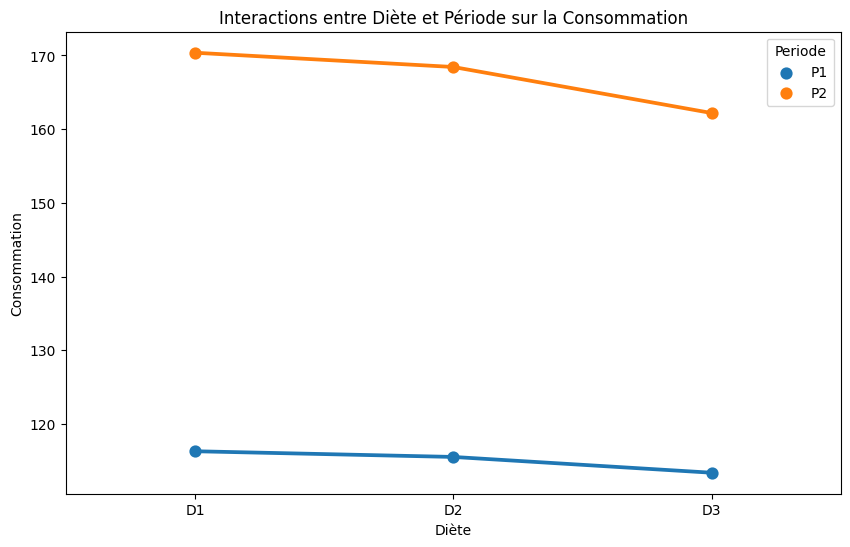

In [ ]:
#Calculer les moyennes conditionnelles
means_conditionnelles = df_cons.groupby(['Diete', 'Periode']).mean().reset_index()

#Afficher les moyennes conditionnelles
print(means_conditionnelles)

#Tracer un graphique pour illustrer les interactions
plt.figure(figsize=(10, 6))
sns.pointplot(x='Diete', y='Consommation', hue='Periode', data=means_conditionnelles, ci=None)
plt.title('Interactions entre Diète et Période sur la Consommation')
plt.xlabel('Diète')
plt.ylabel('Consommation')
plt.show()

La consommation est en moyenne signicativement plus élevée pour tous les diètes durant la période 2.

